# CMSE Project - NBA Salary Predictions

## Aaron Ko 
## 4-24-22

## 1 Background Information
Nba salaries 19-20

https://www.kaggle.com/junfenglim/nba-player-salaries-201920
https://www.kaggle.com/abdurahmanmaarouf/nba-players-stats-2016-2017/tasks?select=NBA+Players+Stats+201819.csv

NBA stats 18-19
https://www.kaggle.com/datasets/schmadam97/nba-regular-season-stats-20182019

Basketball is known to be one of the most timeless played game in history. Originating in 1891, the game has transformed to become not only a fan favorite, but a major revenue scheme. With such an influx of profit, some NBA players are afforeded the luxury of extremely large contracts. From an economic standpoint, or even a common sense one, it is easy to spot the linear relationship thats formed between NBA revenue and the players contracts. Overall, the more profit results in more money being spent of select players (contracts).

The logic is correct and so is the relationship, but there are still some unknowns and uncertainities. The NBA is composed of hundreds of players (including G-league), and there is not enough money to give each player a large contract. The average salary in the NBA is around 8 million, and for this project we will look at large  contracts as 20 million / year. As stated before, common sense plays a big role in finance and how markets function. The better the player, the larger the contract! Seems pretty simple, and I want to get down to core details that endorse those stereotypes. 


# Model Questions
In this model, I will try to evalute and solve several questions:
- What is considered a large contract?
- Who should be awarded large contracts?
- Which NBA stats seem to have a strong relationship with contracts

##  1.1 First, I will import necessary tools to help achieve my goals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import seaborn as sns
%matplotlib inline

### The next two cells will contain the required data sets to be used in the model
- NBA 2019-2020 player salaries
- NBA 2018-2019 player statistics

In [2]:
nbasala = pd.read_csv('nba2019-20-3.csv')

In [3]:
nbastats = pd.read_csv('nbastats2018-2019.csv')

## Important information moving forward
- nbasala dataset: 528 players salaries recorded (2019-2020)
- nbastats dataset: 521 players statistics recorded (2018-2019)

### 1.2 Remodeling the datasets. In regards to the background information, there are several hundred players in the NBA. I believe the smaller the sample, the easier it is to contain and not provide false information.

- Condensing the statistics data; creating baseline parameters
- Creating parameter for NBA salaries to simplify given data

In [4]:
nbasala['salary'].describe()

count    5.280000e+02
mean     7.286797e+06
std      8.733006e+06
min      1.556470e+05
25%      1.618520e+06
50%      3.283020e+06
75%      9.638724e+06
max      4.023176e+07
Name: salary, dtype: float64

In [5]:
salary = nbasala['salary']
mask_sal1 = salary >= 20000000
nbasala1 = nbasala[mask_sal1]

In [6]:
nbastats.drop(nbastats.index[nbastats['Salary'] == '-'], inplace=True)
nbastat1 = nbastats.astype({"Salary": float}, errors='raise') 

In [7]:
salary_stat = nbastat1['Salary']
mask_sal = salary_stat >= 20000000
nbastat1 = nbastats[mask_sal]

The average NBA salary was around 7.2 million dollars for the 19-20 season. 
To set a basis of a "large" contract in the NBA, I will double the average salary ($20 million) as the minimum amount. This was an ideal number since there were only 51 players who recorded a salary that was at or above the minimum amount. This put those 51 players in the top 10% of largest contracts for the 2019-2020 season.

## 1.3 Visualizing the data
- Below is a plot that illustrates the distribution of "large" contracts per position

### Interesting takeaway
- As the position goes from PG to C, the distribution starts to steadily decrease. My understanding is that Point Guards are the primary ball handlers. In simpler terms, they usually touch the ball the most on average per game. The more involved a player is in the game, there is a good chance they can increase their individual statistics like points, assists and rebounds.

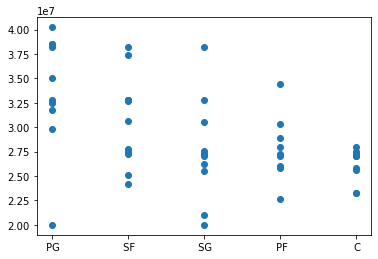

In [8]:
position = nbasala1['position']
salary_pos = nbasala1['salary']
plt.scatter(position, salary_pos)

#### The next cell incorporates 2 histograms that show the differences in salaries based off the following years; 18-19 and 19-20

Text(0.5, 1.0, 'Salary density per 19-20 season')

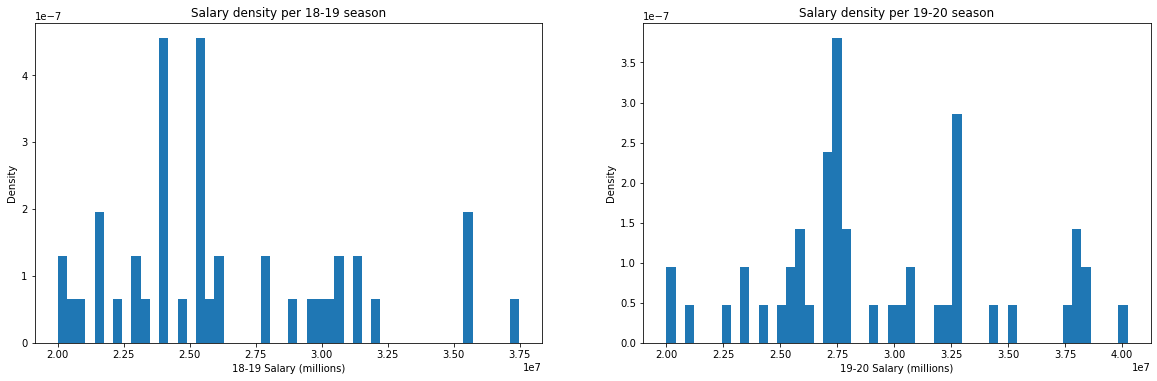

In [9]:
nbastat1 = nbastat1.astype({"Salary": float})
plt.subplots(figsize=(20,20))
plt.subplot(3,2,1)
plt.hist(nbastat1['Salary'],density=True,bins=50)
plt.xlabel('18-19 Salary (millions)')
plt.ylabel('Density')
plt.title('Salary density per 18-19 season')
plt.subplot(3,2,2)
plt.hist(nbasala1['salary'],density=True,bins=50)
plt.xlabel('19-20 Salary (millions)')
plt.ylabel('Density')
plt.title('Salary density per 19-20 season')

## 1.3 Analyzing the data

### The game of basketball, like every sport, includes numerous statistics that visualize individual, team, and league performance. 
- The next cells will generate averages of various statistics to be incorporated in a function created later on
- Plots will also be conducted to observe relationships between the salaries and individual player statistics

### Heat Map
- My next 2 cells are code used to create a heat map. They are used to observe the relationships between variables using color, however I also included numbers to better comprehend.

In [10]:
predic_heat = pd.DataFrame(nbastat1,columns=['Salary', 'Age', 'G',
       'MP', 'PER', 'FG%', 'Points', 'WS', 'WS48', 'BPM', 'FGA', 'Assits', 'Steals', 'Blocks',
        'Rebounds', 'Height', 'Weight', 'Team', 'FTA', 'FT%', 'FG3%', 'FG3A', 'OWS', 'DWS', 'USG', 'VORP'])

corr_heat = predic_heat.corr(method='pearson', min_periods=1)
r_square = corr_heat ** 2

best_var = 7 
best_col = r_square.nlargest(best_var, 'Salary')['Salary'].index
cor_6 = predic_heat[best_col].corr()
cor_square = cor_6 ** 2

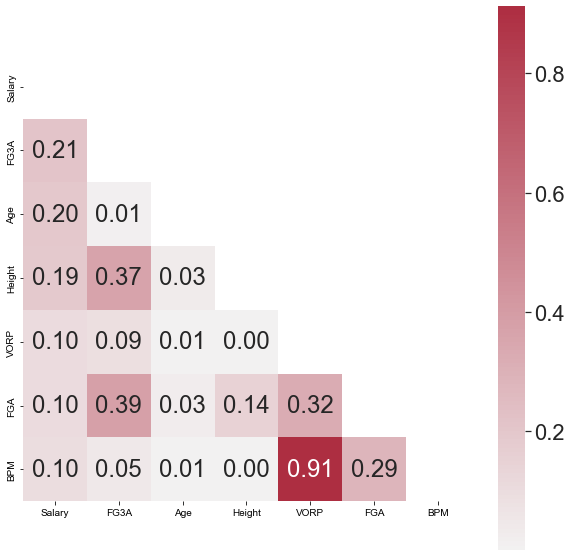

In [11]:
mask_heat = np.triu(np.ones_like(cor_square, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.subplots(figsize=(10,10))
sns.set(font_scale=2.0)
sns.heatmap(cor_square, mask=mask_heat, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.show();

## Heat maps are unique plots that express results through color instead of numbers. I wanted to incorporate numbers however to make it easier to understand what is going on. The scale is from 0-1 and the closer you get to 1, the stronger the relationship is. 
- VORP and BPM seem to have strongest relationship between all variables.
- FG3A looks to have the strongest relationship of all the tested variables with the predicted variable, Salary.

### Since there are over 25 individual statistics inside the nba statistic dataset, I wanted to choose the 6 variables with the strongest correlation to salaries. 

### The 6 strongest correlated variables regarding salaries
- FG3A: 3-point field goal attempts per game
- Age
- Height
- Box plus-minus: Evaluates players quality and contribution to their respective team from play-by-play regression
- FGA: field goal attempts per game
- VORP: Estimate of points per 100 team posessions that a player contributed above replacement-level player, in regards to an average team and an 82 game season

### VIF Factor
Next, I will use the VIF factor to test how credible each statistic really is to the test; Salary. The lower the number, the more reassurance we have that the variable contributes to our model. This will help me narrow down from 6 to 4 statistics to base salaries off of.

In [12]:
x = nbastat1[['Age', 'VORP', 'Height', 'BPM', 'FGA', 'FG3A']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,73.7,Age
1,37.1,VORP
2,93.3,Height
3,21.0,BPM
4,29.4,FGA
5,7.7,FG3A


### Below are plots of the 4 strongest correlated variables and their individual relationships with the predictor variable, Salary. 
- All plots show pretty condensed results. There are some outliers which tend to be in the higher end of the spectrum. 
- From a blind eye, VORP and FG3A stats seem to have the stronger relationships compared to FG and BPM.

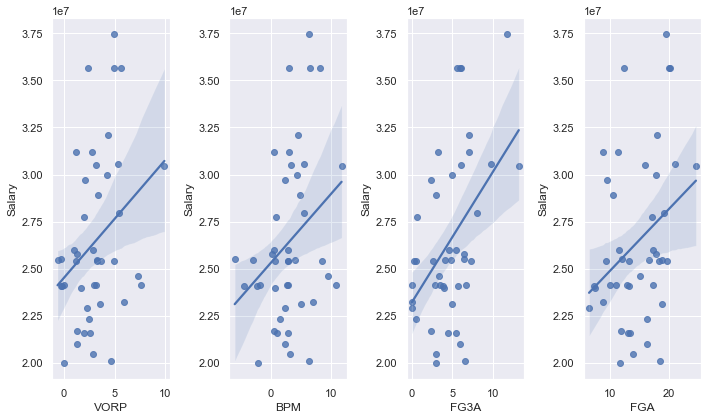

In [14]:
vorp = nbastat1['VORP']
fga = nbastat1['FGA']
fg3a = nbastat1['FG3A']
bpm = nbastat1['BPM']
sala_4 = nbastat1['Salary']

fig, axes = plt.subplots(1, 4)
sns.set(rc = {'figure.figsize':(10,6)})

sns.regplot(x=vorp,y=sala_4, ax = axes[0])
sns.regplot(x=bpm,y=sala_4, ax = axes[1])
sns.regplot(x=fg3a,y=sala_4, ax = axes[2])
sns.regplot(x=fga,y=sala_4, ax = axes[3])
fig.tight_layout()

## 1.4 Interpreting the results

### Linear Regression 
There are really neat tools to use from the package: sklearn.linear_model. I will be importing LinearRegeression from the package to better understand the correlation between the 4 variables and salaries. 80/20 split is used to split the data into train and test sets. We use the training dataset to test in our model and interpret the results by comparing to the testing set.

- Coefficient: How much the predicted response (Salary) is projected to move up when X (VORP, BPM, FG3A, FGA) increases by 1
- Score: How correlated X is correlated with the predicted response on a scale from 0-1; 1 being a strong positive relationship

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

### Reassurance
Before analyzing my data, I want to make sure to use the correct model to ensure credibility for the answers to the project questions. 

#### Residual Plot
A residual plot is a fast and efficient way to pick the right model for your data. If the data points are scattered around, linear regression models will provide a sufficent fit for the data.

In [16]:
x = nbastat1[['VORP', 'BPM', 'FG3A', 'FGA']]
y = nbastat1[['Salary']]

xmodel, xtest, ymodel, ytest = train_test_split(x, y, test_size=0.2, random_state=101)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=101)

linear_regression = LinearRegression()
model = linear_regression.fit(xtrain, ytrain)

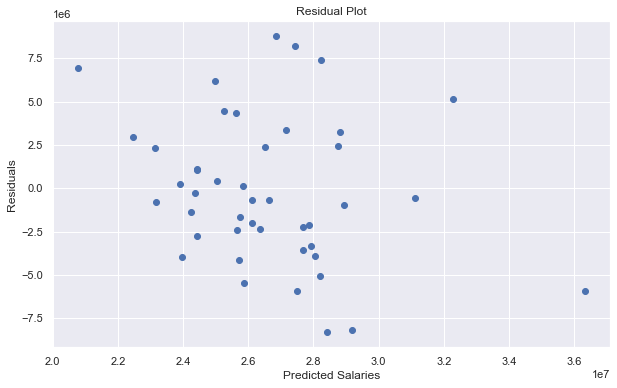

In [17]:
predict = cross_val_predict(linear_regression,x, y, cv=6)

residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [18]:
model.coef_

array([[-273702.01038942,  484381.99791941,  694050.39902382,
         -77231.9296557 ]])

In [19]:
model.score(xtrain, ytrain)

0.26570187518928456

### Important takeaways
The results are somewhat surprising considering the fact that VORP was considered to have the strongest positive relationship with salaries. However as VORP increases, salaries decrease in sum. 3-point field goal attempts lead all 4 variables with the largest salary boost, then follows BPM and FGA.
- INC VORP, FGA = DEC Salary
- INC FG3A, BPM = INC Salary
- Overall, even the strongest correlated variables with the predictor still dont have an overall strong relationship

### Salary Prediction function
Below is a function that intakes the 4 strongest variables and outputs an estimated salary. I used .sample() to initiate random values for the variables. This is a neat and efficient way to play around with statistics and get a grasp of what it possibly takes to earn tens of millions. 

In [20]:
def salary_prediction(v_t,b_t,f3_t,f_t):
    predicted_sala = model.predict(m)

    return predicted_sala

m = xmodel.sample()
v_t = xmodel['VORP'].sample()
b_t = xmodel['BPM'].sample()
f3_t = xmodel['FG3A'].sample()
f_t = xmodel['FGA'].sample()

salary_prediction(v_t,b_t,f3_t,f_t)

array([[26385483.17832999]])

## RMSE Calculation
The Root-mean-square deviation is a measurement tool used to understand the validity of variables to testing models. In a way, it is a way to visualize the actual difference between the estimated and the measured value.

In [21]:
def rmse_model(model, xtest, ytest):
    predictions = model.predict(xtest)
    rmse = np.sqrt(mean_squared_error(predictions, ytest))
    return(rmse)
score = metrics.r2_score(y, predict)
print ('RMSE: ', rmse_model(linear_regression, xtest, ytest))
print ('R sq: ', score)

RMSE:  2368900.978163854
R sq:  0.09014113685318792


The R sq is based on a scale from 0-1. 0.2 through 0.5 deem the model able to roughly predict the data accurately. Although my R sq is extremely small, we condensed the data by nearly 90% which will account for the bad score. One takeaway from this is that when regarding NBA contracts, there is plentiful important factors that need to be considered to have a very accurate prediction model.

## 1.5 Conclusion

### Recap
We will look over each Model question and provide an answer along with an explanation on how I arrived at that answer

### 1. What is considered a large contract?
Before answering, I want to provide sufficient information to understand the logic I used to arrive at the answer. The data set had approximately 521 players recorded. First, by taking the mean, the results were around 7 million dollars. When defining a "large contract", I wanted to incorporate only the top 10% of players. I did simple mathmatical equations above that produced a cutoff of 20 million dollars for the top 10% of player contracts.

### 2. Who should be awarded large contracts? | Which NBA stats seem to have a strong relationship with contracts?
Obviously there is a lot to account for when NBA teams decide to construct player contracts. There are common sense variables like points, assits, and rebounds per game; as most would say are generally the most watched stats. However, numerous variables are not so easy to spot like salary cap or size of franchise or team needs. I decided to only look at the on-court variables to provide an accurate estimate of which individual statistics leads to larger contracts in terms of money. Since there are various stats, by implementing a heat map I was able to narrow down to the 6 strongest correlated variables relating to salaries. Even further, I used a VIF factor to fish out 2 variables that may actually not correlate well with our predictor. Overall, the last 4 stats were VORP, BPM, FG3A, and FGA which seem to have the strongest relatiosnhip regarding contracts. In the above code I have explanations for each said stat. There were multiple observations above that provided the evidence needed to answer the question referring to who? Point guards led the charge with the most large contracts, with a pattern of; increase in height = decrease in salary. 3-point field goal attempts was another vital factor for the top NBA contracts. As seen in the coefficent model, adding 1 more to the stat increases salaries by 700 thousand dollars. This number was almost double the closests leading variable (BPM). Looking back at the heat map, age had the second strongest relationship. As age increases, so does salaries. This theory seems credible because younger players are bound to rookie contracts and minimum deals to prove their worth which comes with time and development in the league. Altogether, the above statements are backed up with credible evidence to answer the questions about stats and which players to award contracts.



My experience and advice: 
To conclude, I was satisfied with my results and the overall structure of my project. As a huge NBA fan, being able to understand the league in more depth builds the passion for the game. I learned numerous interesting facts and trends that can be invisible to many. For anyone who may plan to create a similar project, there are some tips and tricks to help succeed. As stated above, there are multiple factors to account for regarding contracts. Creating an efficient project means condensing certain data and narrowing down your main point of focus to attack. Placing in a plot here and there will be a great way to visualize your data analysis throughout your journey. 

### Refrences

- https://www.askpython.com/python/examples/python-predict-function
- https://www.kaggle.com/code/aishjun/nba-salaries-prediction-in-2017-2018-season/notebook
- https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
- https://stattrek.com/regression/residual-analysis.aspx
- https://datatofish.com/random-rows-pandas-dataframe/